In [2]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import *
from visualizingData import *
import pandas as pd
import os
import ast


In [3]:
# Load the data from the specified .npz file
file = np.load("..\\..\\data_manip\\provided_data\\SIMS.npz", allow_pickle=True)


# # Extract the necessary components from the file
print(file.files)

selected_B = file['selected_B'][()]
shape = file['shape'][()]
mz_values = file['mz'][()]



['selected_B', 'shape', 'mz']


In [4]:
selected_B.nnz/np.prod(selected_B.shape)

0.05285012716917661

In [5]:
# als je de sims of qtof om will zetten in een matrix die je miss wilt zien
dense_matrix_format = selected_B.toarray()
mask = np.where(dense_matrix_format==0, 0, 1)

In [6]:
# visualizeData(dense_matrix_format)
# visualizeData(mask)


In [7]:
DENSE, MASK = dense_matrix_format, mask

In [8]:
def dimensionChange(M,k):
    return M[:k,:k] 

def dataNMaskChange(M_dense_matrix, mask, k):
    M_dense_matrix = dimensionChange(M_dense_matrix,k)
    mask= dimensionChange(mask,k)
    return M_dense_matrix, mask


In [9]:
DENSE, MASK = dataNMaskChange(M_dense_matrix=DENSE, mask=MASK, k=2000)

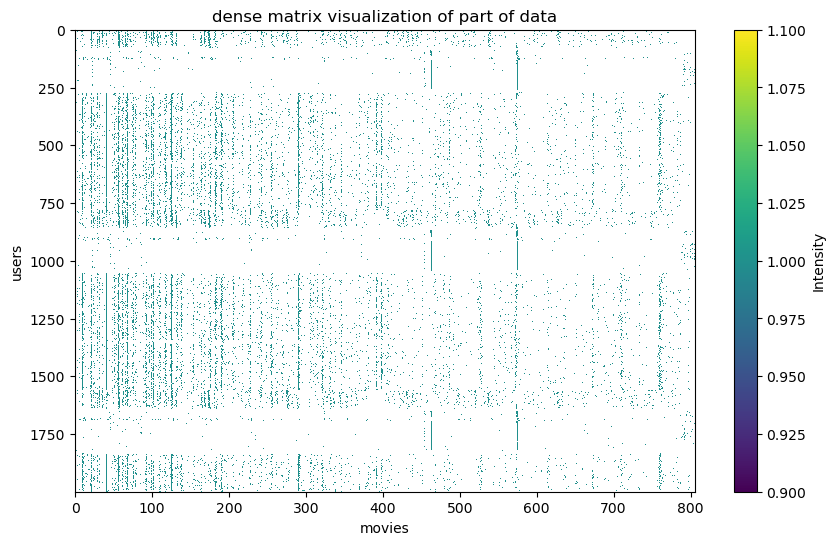

In [10]:
visualizeData(np.where(MASK==0,np.nan,1))

In [11]:
# Matrix dimensions
m, n = DENSE.shape

# Initializing matrices and variables
R = DENSE  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparametersgamma = .001
delta = 1e-1  # Tolerance level for optimization
num_iterations = 100  # Number of iterations for optimization
r_stop = min(m,n)//10
print(r_stop)
gamma=.001

# Generate rhos for each lambda
rho= .1*r_stop/np.linalg.norm(DENSE,'fro')

lamda=rho*.1  # Regularization parameter λ values

# LAMDA ALS FUNCTIE VAN RHO EN CURVEFITTEN VOOR WELKE WAARDE VAN X IK RHO*X= LAMDA MOET UITVOEREN

80


In [12]:
# Calculate epsilon based on matrix size and gamma
epsilon = m * n * gamma  # Error threshold as defined in the paper

# Print current parameter settings


# Run the optimization function with the current parameters
P_final, Z_final, u_final, y_final, s_final, errors, r_errors, rank = LMSC_optimize_rank_stop(
    rho, lamda, R, P_init, MASK, u_init, y_init, s_init, delta, epsilon, num_iterations, r_stop
)

Is lambda smaller then rho?: True
0: rank=3
10: rank=3


KeyboardInterrupt: 

In [28]:
lamda/rho

0.1

In [29]:
rank

3

In [36]:
r_errors

[(27.747689174340934, 2.929156722725562, 30.676845897066485),
 (31.27458535141021, 1.414933299154998, 32.689518650565205),
 (31.439111634725375, 1.3957884727729404, 32.83490010749832),
 (31.487452360872286, 1.3924180582933088, 32.87987041916558),
 (31.50818308571347, 1.3912514476258864, 32.899434533339345),
 (31.51954866322163, 1.3907137685902948, 32.9102624318119),
 (31.526828585778954, 1.3904142513283748, 32.91724283710734),
 (31.531964305515388, 1.3902318094077633, 32.92219611492314),
 (31.535801888632736, 1.3901163713287903, 32.92591825996152),
 (31.538788511103377, 1.3900376698417922, 32.928826180945165),
 (31.54118565963902, 1.3899854812890462, 32.931171140928065),
 (31.543159727649368, 1.3899485860149714, 32.93310831366432),
 (31.54481479072019, 1.3899201257956733, 32.93473491651586),
 (31.546223355331986, 1.3898938228119786, 32.936117178143945),
 (31.547444152649234, 1.3898730443453122, 32.93731719699453),
 (31.548512679223244, 1.389854568524477, 32.93836724774769),
 (31.549457

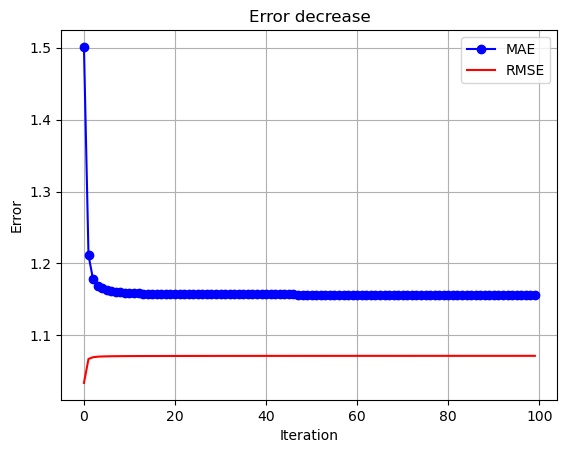

In [31]:
# relErrorPlot(errors=r_errors)
errorPlot(errors=errors)

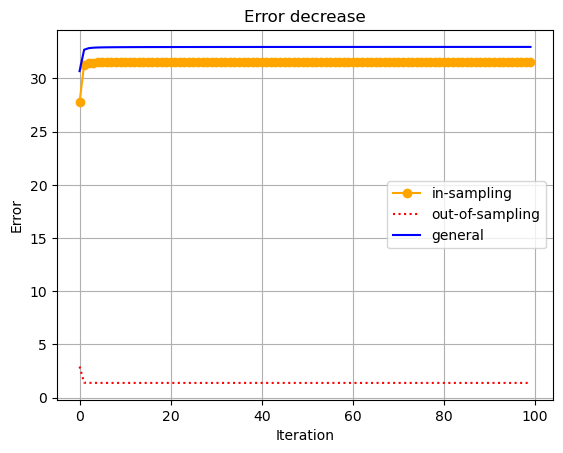

In [32]:
relErrorPlot(r_errors)

In [33]:
allErrors(ground_truth[:2000,:2000], Z_final, MASK)

NameError: name 'ground_truth' is not defined

In [34]:
allErrors(ground_truth[:2000,:2000], P_final, MASK)

NameError: name 'ground_truth' is not defined

In [35]:
csc_matrix(Z_final).nnz/np.prod(Z_final.shape)

0.1759137717121588

In [ ]:

def SVD_truncated(A, k):
    """
    Apply the thresholding operator to the singular values of X
    """
    U, S, V = np.linalg.svd(A, full_matrices=False)
    n= len(S)
    
    if k > n:
        k = n
    
    S= S[:k]
    U = U[:, :k]
    V = V[:k, :]
    return (U* S) @ V


In [67]:
100* np.linalg.norm(SVD_truncated(dense_matrix,20)-dense_matrix, 'fro')/np.linalg.norm(dense_matrix, 'fro')


35.45712492799889

In [97]:
100*np.linalg.norm((P_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

ValueError: operands could not be broadcast together with shapes (400,2000) (400,1372421) 

In [65]:
100*np.linalg.norm((Z_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

49.86943779810618